In [1]:
%load_ext autoreload
%autoreload 2

In [1]:
from chunk_classifier import *
from board_builder import *
import albumentations as A
from img_render import *

In [3]:
transform = A.Compose([
    A.ColorJitter(p=0.5, hue=(0, 0.05)),
    A.RandomGamma(p=0.5),
    A.Blur(p=0.5),
    A.RandomRotate90(p=0.5),
])

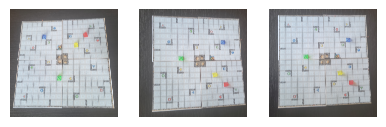

In [21]:
imgs_path = list((DATA_PATH / "../pictures").glob("*"))
# img_path = str(np.random.choice(imgs_path, 1)[0])
images = [cv2.imread(str(img_path)) for img_path in imgs_path]
for i, img in enumerate(images):
    plt.subplot(3, 4, i + 1)
    plt.imshow(img[:,:,::-1])
    plt.axis("off")

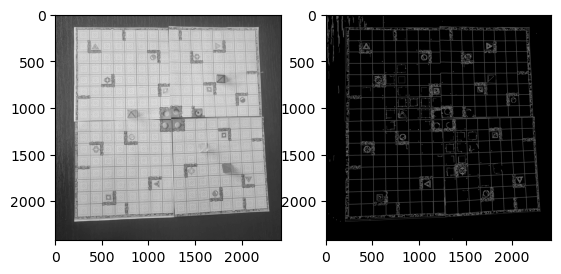

In [22]:
grey_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
grey_img = cv2.blur(grey_img, (3, 3))
plt.subplot(121)
plt.imshow(grey_img, cmap="gray")
sigma = 0.75
v = np.median(grey_img)
lower = int(max(0, (1.0 - sigma) * v))
upper = int(min(255, (1.0 + sigma) * v))
edges = cv2.Canny(grey_img, lower, upper)
plt.subplot(122)
plt.imshow(edges, cmap="gray")

In [13]:
# chunks = np.array([get_chunks(projected) for projected in projecteds]).reshape(-1, 64, 64, 3)
# for chunk in chunks:
#     cv2.imwrite(str(DATA_PATH / "chunks" / f"{random_string(6)}.png"), chunk[:,:,::-1])

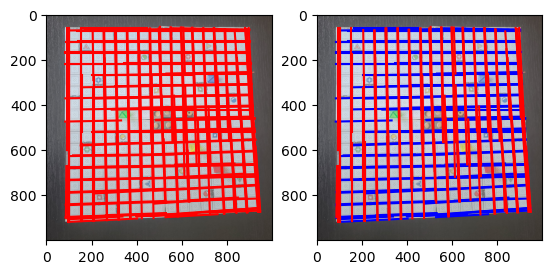

In [23]:
img = image_resize(img, height=1000)
lines = get_lines(img)
plt.subplot(121)
plt.imshow(img[:, :, ::-1])
for x1, y1, x2, y2 in lines:
    plt.plot([x1, x2], [y1, y2], "-", color="red")
h_lines, v_lines = classify_lines(lines)
plt.subplot(122)
plt.imshow(img[:, :, ::-1])
for x1, y1, x2, y2 in h_lines:
    plt.plot([x1, x2], [y1, y2], "-", color="blue")
for x1, y1, x2, y2 in v_lines:
    plt.plot([x1, x2], [y1, y2], "-", color="red")



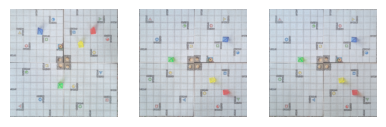

In [25]:
projecteds = [get_square(image_resize(img)) for img in images]
for i, img in enumerate(projecteds):
    plt.subplot(3, 4, i + 1)
    plt.imshow(img[:,:,::-1])
    plt.axis("off")

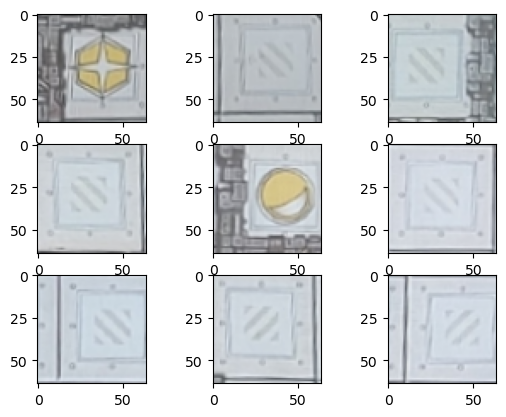

In [28]:
chunks = np.array([get_chunks(projected) for projected in projecteds]).reshape(-1, 64, 64, 3)
for i, idx in enumerate(np.random.choice(np.arange(len(chunks)), 9)):
    plt.subplot(3, 3, i+1)
    plt.imshow(chunks[idx][:,:,::-1])


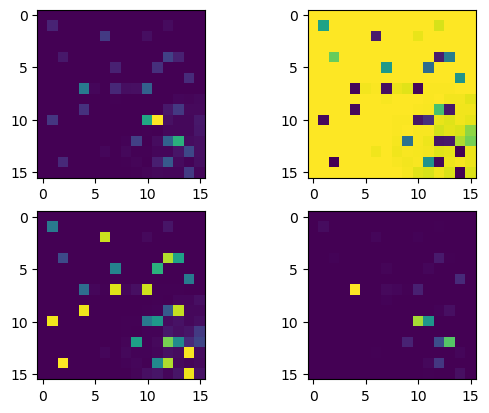

In [30]:
projected = get_square(img)
chunks = get_chunks(projected)
proba = predict_chunks(chunks).reshape(16, 16, 4)
for i in range(4):
    plt.subplot(2, 2, i+1)
    plt.imshow(proba[:, :, i])

In [45]:
projected = get_square(img)
chunks = get_chunks(projected)
proba = predict_chunks(chunks).reshape((16, 16, 4))
board = get_board_bg(proba)
robots = get_robots(chunks.reshape((16, 16, 64, 64, 3)), proba[:, :, 3])
# chunks, proba = chunks.reshape((16, 16, 64, 64, 3)), proba[:, :, 3]

In [43]:
coords = np.argwhere(proba >= .2)
coords

array([[ 7,  4],
       [10, 10],
       [12, 12]])

array([[0.02260853, 0.04131501, 0.06310031, 0.87297615]])

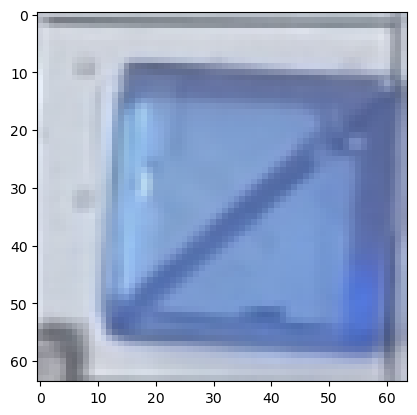

In [44]:
plt.imshow(chunks.reshape((16, 16, 64, 64, 3))[4, 12][:,:,::-1])
predict_robots([chunks.reshape((16, 16, 64, 64, 3))[4, 12]])

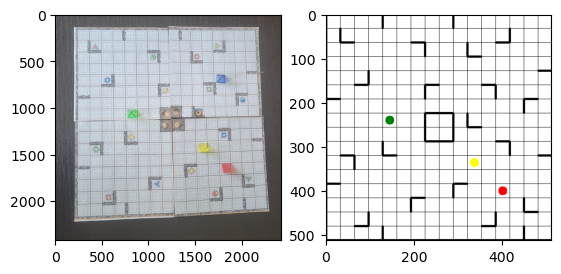

In [34]:
img = images[2]
plt.subplot(1, 2, 1)
plt.imshow(img[:,:,::-1])
board = build_board(img)
board_render = render_board(board["robots"], board["walls"])
plt.subplot(1, 2, 2)
plt.imshow(board_render.copy())